<a href="https://colab.research.google.com/github/Kratos40-sba/coronaPredectionAlgeria/blob/master/coronadz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date
import time
from scipy.optimize import curve_fit

In [0]:
#Constants 
CSV_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
COUNTRY = "Algeria"

In [0]:
#model expo 
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [0]:
# lecture de fichier csv 
df = pd.read_csv(CSV_URL)
# filtrage par une seul pays 'algeria' 
df = df[df["Country/Region"] == COUNTRY]
# drop columns li ma3ndhomch fayda 
df = df.drop(columns=["Country/Region", "Province/State", "Lat", "Long"])

In [0]:
# from pd to pd.series :) 
df = df.iloc[0]    
# predictions and ploting
df.index = pd.to_datetime(df.index, format='%m/%d/%y')

# fit to exponential function
time_in_days = np.arange(len(df.values))
poptimal_exponential, pcovariance_exponential = curve_fit(exponential, time_in_days, df.values, p0=[0.3, 0.205, 0])

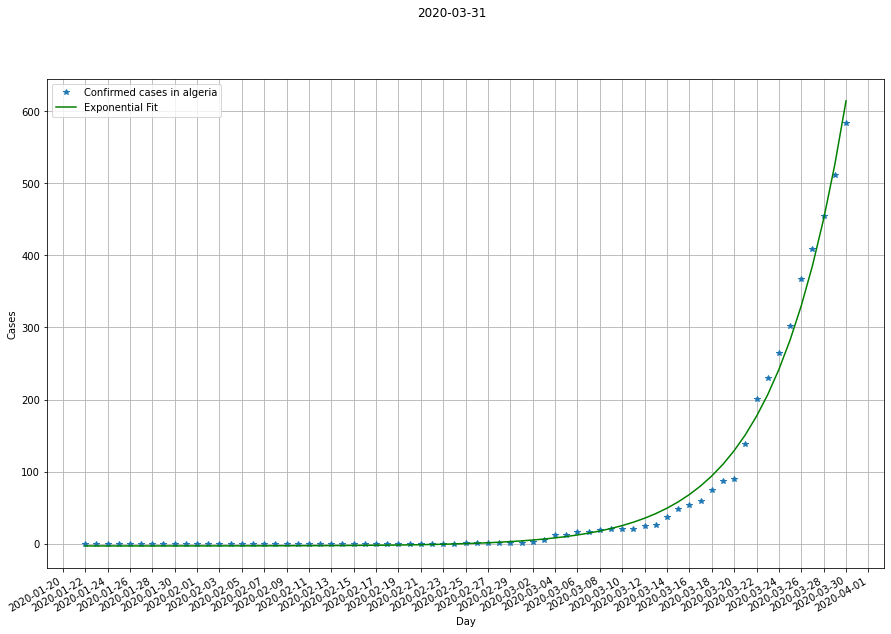

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df.index, df.values, '*', label="Confirmed cases in algeria")
ax.plot(df.index, exponential(time_in_days, *poptimal_exponential), 'g-', label="Exponential Fit")
ax.set_xlabel("Day")
ax.set_ylabel("Cases")
ax.legend()
ax.grid()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
fig.suptitle(date.today())
fig.autofmt_xdate()
 
prediction_in_days = 5
time_in_days = np.arange(start=len(df.values), stop=len(df.values)+prediction_in_days)
prediction = exponential(time_in_days, *poptimal_exponential).astype(int)
df_prediction = pd.Series(prediction)

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
2020-02-21       0
2020-02-22       0
2020-02-23       0
2020-02-24       0
2020-02-25       1
2020-02-26       1
2020-02-27       1
2020-02-28       1
2020-02-29       1
2020-03-01       1
2020-03-02       3
2020-03-03       5
2020-03-04      12
2020-03-05      12
2020-03-06      17
2020-03-07      17
2020-03-08      19
2020-03-09      20
2020-03-10      20
2020-03-11      20
2020-03-12      24
2020-03-13      26
2020-03-14  

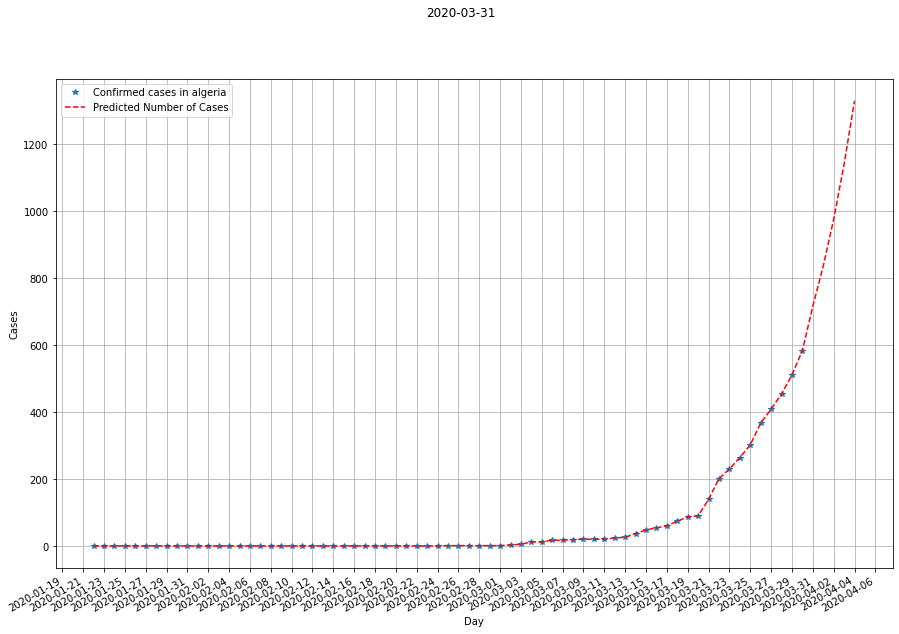

In [16]:
df_prediction.index = pd.date_range(df.index[-1], periods=prediction_in_days+1, closed="right")

df_prediction = df.append(df_prediction)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_prediction)

# Plot prediction
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df.index, df.values, '*', label="Confirmed cases in algeria")
ax.plot(df_prediction.index, df_prediction.values, 'r--', label="Predicted Number of Cases")
ax.set_xlabel("Day")
ax.set_ylabel("Cases")
ax.legend()
ax.grid()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
fig.suptitle(date.today())
fig.autofmt_xdate()
fig.show()